In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 1. 讀入Fashion MNSIT 

In [65]:
from tensorflow.keras.datasets import fashion_mnist

In [66]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 2. 欣賞數據集內容

In [67]:
x_train.shape

(60000, 28, 28)

In [68]:
x_test.shape

(10000, 28, 28)

In [69]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

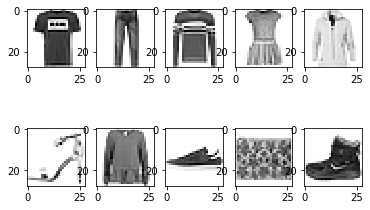

In [70]:
l = []
for i in set(y_train):
    n =  np.where(y_train == i)[0][0]
    l.append(n)

i = 1
for j in l:
    plt.subplot(2,5,i)
    plt.imshow(x_train[j].reshape(28,28), cmap="Greys")
    i += 1

In [71]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 3. 資料整理

In [72]:
print('max:' ,x_train[0].max())
print('min:' ,x_train[0].min())

max: 255
min: 0


轉換資料格式

In [73]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [74]:
x_train[0].shape

(28, 28, 1)

In [75]:
y_train[0]

9

In [76]:
from tensorflow.keras.utils import to_categorical

In [77]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [78]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# 4. 打造神經網路

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [80]:
model = Sequential()

model.add(Conv2D(16, (3,3), padding='same', input_shape=(28,28,1), activation='relu'))
#padding='same': 輸入跟輸出都是28*28
#輸出是16個28*28矩陣(16個channel)，實際上是(28*28*16)
#filter是3*3
model.add(MaxPooling2D(pool_size=(2,2)))
#每張記分板切成2*2(14,14,16)

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
#輸出是(14,14,32)
model.add(MaxPooling2D(pool_size=(2,2)))
#output: (7,7,32)

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#轉成一維陣列
model.add(Flatten())

In [81]:
#進入全連接層
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
#softmax: 介於0跟1之間，機率總和=1，適合多分類

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [83]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.05), metrics=['accuracy'])
#categorical_crossentropy應用於多分類

# 5. 訓練

In [84]:
history = model.fit(x_train, y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 29s 489us/sample - loss: 0.9620 - accuracy: 0.6454 - val_loss: 0.6572 - val_accuracy: 0.7586
Epoch 2/12
60000/60000 [==============================] - 31s 521us/sample - loss: 0.5543 - accuracy: 0.7944 - val_loss: 0.5356 - val_accuracy: 0.7996
Epoch 3/12
60000/60000 [==============================] - 32s 539us/sample - loss: 0.4512 - accuracy: 0.8365 - val_loss: 0.4399 - val_accuracy: 0.8426
Epoch 4/12
60000/60000 [==============================] - 29s 492us/sample - loss: 0.3996 - accuracy: 0.8547 - val_loss: 0.3872 - val_accuracy: 0.8612
Epoch 5/12
60000/60000 [==============================] - 29s 479us/sample - loss: 0.3655 - accuracy: 0.8662 - val_loss: 0.3811 - val_accuracy: 0.8664
Epoch 6/12
60000/60000 [==============================] - 29s 486us/sample - loss: 0.3454 - accuracy: 0.8752 - val_loss: 0.3679 - val_accuracy: 0.8683
Epoch 7/12
60000/60000 [====================

# 6. 訓練結果

In [85]:
result_train = model.evaluate(x_train, y_train, batch_size = 100)

60000/60000 [==============================] - 9s 148us/sample - loss: 0.2602 - accuracy: 0.9051


In [86]:
result_test = model.evaluate(x_test, y_test, batch_size = 100)

10000/10000 [==============================] - 2s 154us/sample - loss: 0.3113 - accuracy: 0.8900


In [87]:
loss, acc = result_test
print('測試資料的正確率為:', acc)

測試資料的正確率為: 0.89


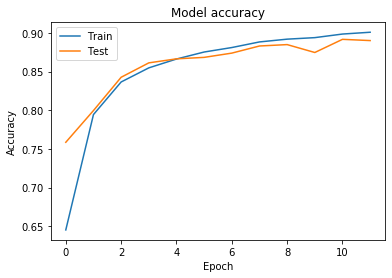

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7. 預測

In [41]:
result = model.predict_classes(x_test)

In [50]:
def my_predict(n):
    print("CNN prediction is:", labels[result[n]])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap="Greys")

In [43]:
from ipywidgets import interact_manual

In [51]:
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>